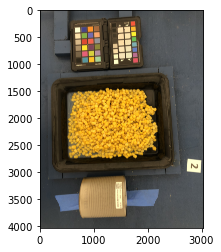

In [5]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
from PIL import Image
from plantcv import plantcv as pcv

im = imread('IMG_0015.jpg')
#plt.figure(figsize=(20,10));
plt.imshow(im)

#imm=Image.open('IMG_0001.jpg')

#rotate_img = pcv.transform.rotate(im, 90, True)
#plt.imshow(rotate_img)


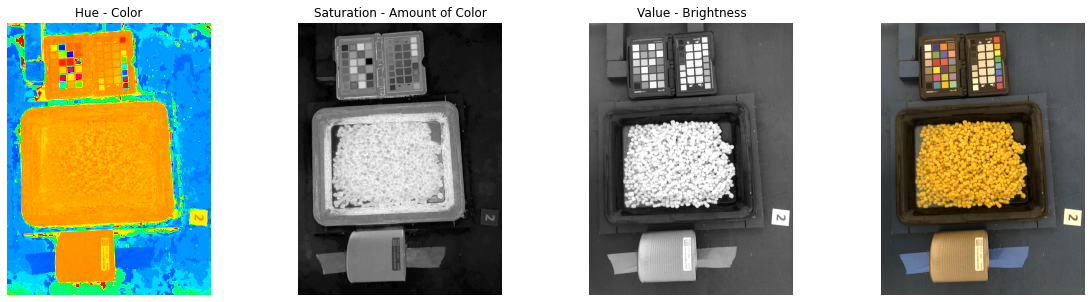

In [6]:
import colorsys
import matplotlib.colors as colors


hsv = colors.rgb_to_hsv(im)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.imshow(hsv[:,:,0], cmap='hsv')
ax1.set_title('Hue - Color')
ax1.set_axis_off()

ax2.imshow(hsv[:,:,1],cmap='gray',vmin=0, vmax=1)
ax2.set_title('Saturation - Amount of Color')
ax2.set_axis_off()

ax3.imshow(hsv[:,:,2],cmap='gray')
ax3.set_title('Value - Brightness')
ax3.set_axis_off()

ax4.imshow(im)
ax4.set_axis_off()

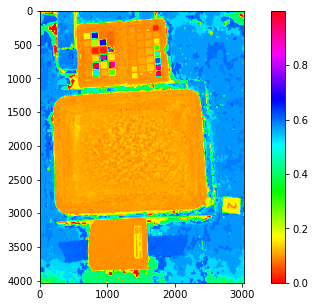

In [7]:
plt.figure(figsize=(10,5));
plt.imshow(hsv[:,:,0], cmap='hsv');
plt.colorbar();

In [8]:
from ipywidgets import interactive,fixed

def hsv_color_threshold(im, hmin=-0.01,hmax=1.01, smin=-0.01,smax=1.01,vmin=-1,vmax=256):
    # Pull out the red, gree and blue matrixes
    hsv = colors.rgb_to_hsv(im)
    h = hsv[:,:,0];
    s = hsv[:,:,1];
    v = hsv[:,:,2];
    
    # trick because the color space wraps
    if hmin > hmax:
        b_img = (h > hmin) | (h < hmax)
    else:
        b_img = (h > hmin) & (h < hmax);
    
    
    b_img = (b_img & 
         (s > smin) & (s < smax) & 
         (v > vmin) & (v < vmax));
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    ax1.imshow(im)
    ax1.set_axis_off()
    
    ax2.imshow(b_img,cmap='gray', vmin=0, vmax=1)
    ax2.set_title('Value - Brightness')
    ax2.set_axis_off()

    plt.show()
    return b_img*1;

w = interactive(hsv_color_threshold, im=fixed(im),
         hmin=(-0.01,1.01,0.01), hmax=(-0.01,1.01,0.01), 
         smin=(-0.01,1.01,0.01), smax=(-0.01,1.01,0.01), 
         vmin=(-1,256), vmax=(-1,256),__manual=True);
w

interactive(children=(FloatSlider(value=-0.01, description='hmin', max=1.01, min=-0.01, step=0.01), FloatSlide…

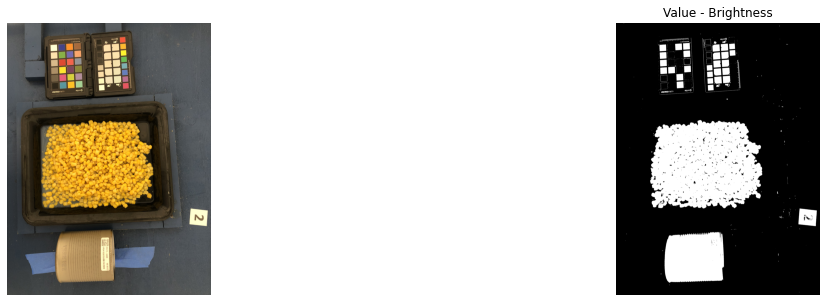

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
hsv_color_threshold(im, 0.05,0.19, 0.07, 1.01, 129, 256)

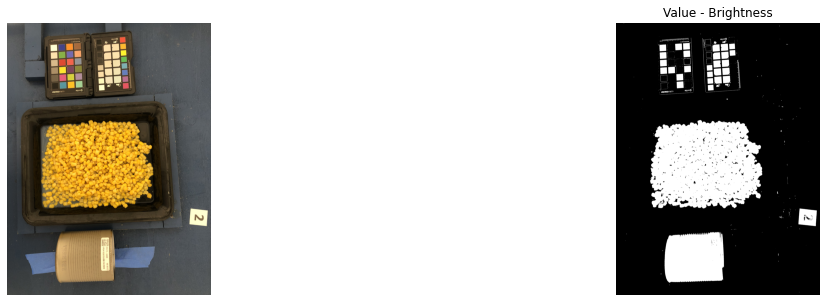

In [12]:
binary_im = hsv_color_threshold(im, 0.05,0.19, 0.07, 1.01, 129, 256)

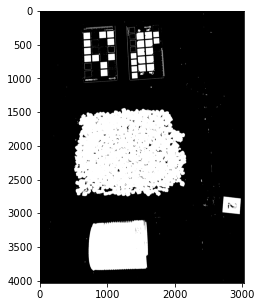

In [13]:
#display the binary image result from color segmentation
plt.figure(figsize = (10,5))
plt.imshow(binary_im, cmap='gray',vmin=0,vmax=1);

In [14]:
from scipy import ndimage
bw1 = ndimage.binary_erosion(binary_im, iterations=5)
bw2 = ndimage.binary_dilation(bw1, iterations=7)

Text(0.5, 1.0, 'Erosion and then Dilation')

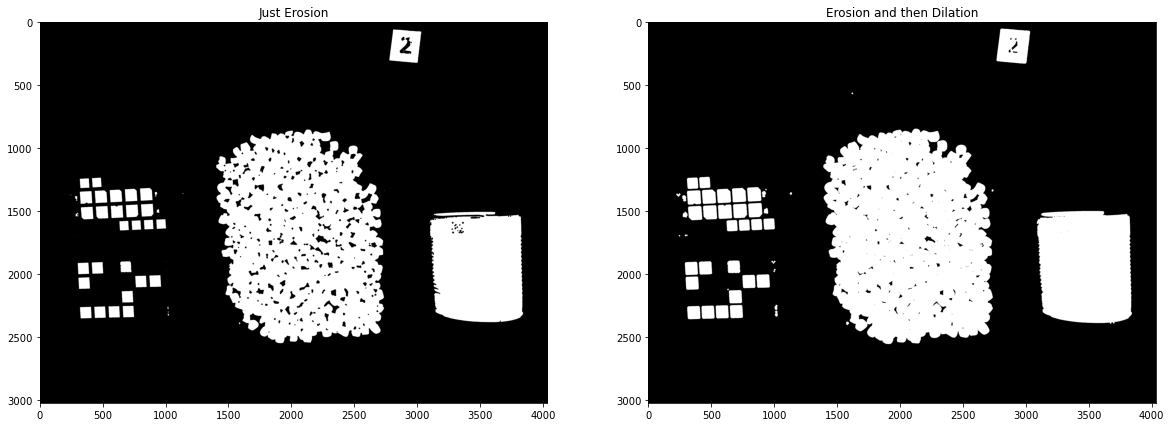

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
im2 = im.copy()
ax1.imshow(bw1, cmap='gray')
ax1.set_title("Just Erosion")

im2 = im.copy()
ax2.imshow(bw2,cmap='gray')
ax2.set_title("Erosion and then Dilation")

Text(0.5, 1.0, 'Segmented Image')

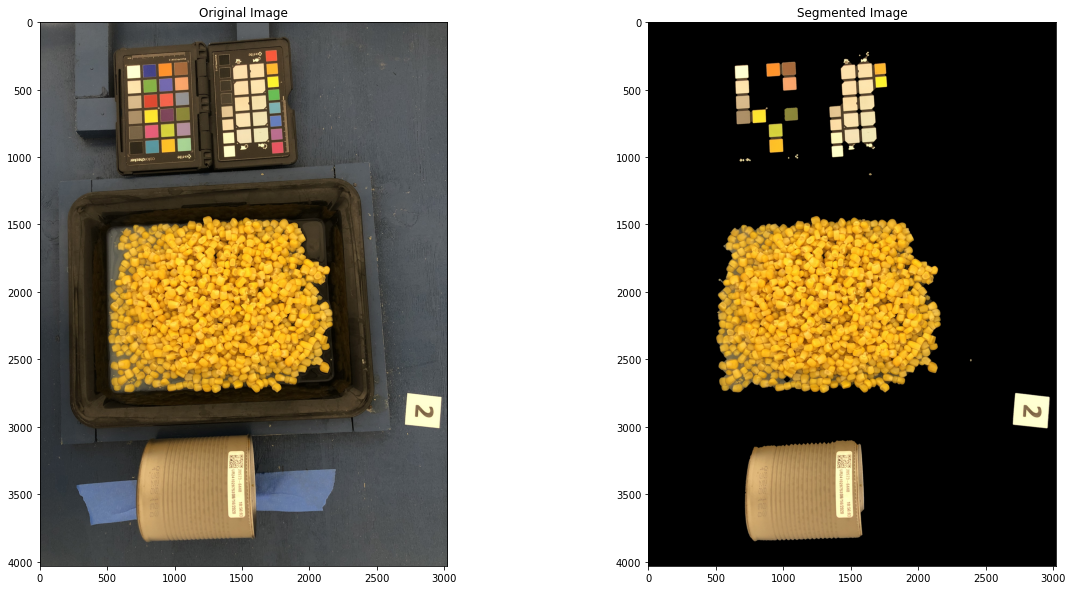

In [15]:
bw1 = ndimage.binary_erosion(binary_im, iterations=5)
bw2 = ndimage.binary_dilation(bw1, iterations=7)
bw3 = ndimage.binary_closing(bw2, iterations=20)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(im)
ax1.set_title("Original Image")

im2 = im.copy()
im2[bw3==False,:] = 0 #Remove Background
ax2.imshow(im2)
ax2.set_title("Segmented Image")

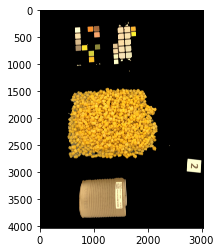

In [16]:
plt.imshow(im2)

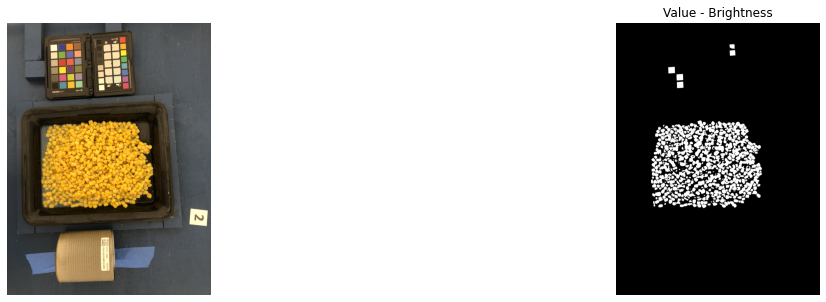

In [17]:

bw=hsv_color_threshold(im,0.11,0.19,0.44,1.01,200,256)

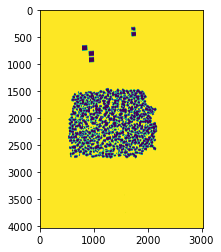

In [18]:
from scipy import ndimage
lab, num_features = ndimage.measurements.label(bw)
plt.imshow(lab==0)

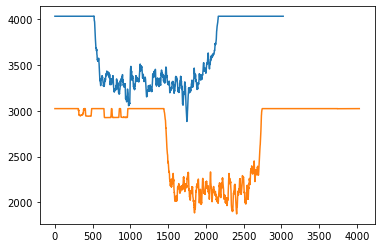

In [31]:
plt.plot(np.sum(lab==0,axis=0))
plt.plot(np.sum(lab==0,axis=1))
#temp=np.sum(lab==0,axis=0)<2500
#plt.plot(temp)
axis_0=np.where(np.sum(lab==0,axis=0)<2800)
axis_1=np.where(np.sum(lab==0,axis=1)<4000)

if(len(axis_0[0])==0):
    axis_0=np.where(np.sum(lab==0,axis=0)<4000)
    axis_1=np.where(np.sum(lab==0,axis=1)<2800)

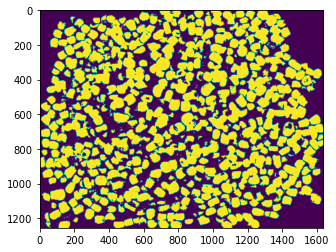

In [32]:
st1=axis_0[0][0]
st2=axis_1[0][0]
en1=axis_0[0][-1]
en2=axis_1[0][-1]
plt.imshow(bw[st2:en2,st1:en1])

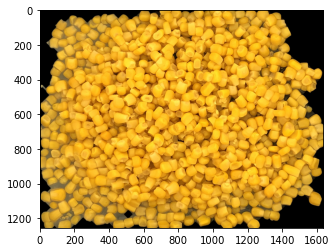

In [33]:
plt.imshow(im2[st2:en2,st1:en1])